In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df_raw = pd.read_csv("data/purchase data.csv")

In [4]:
df= df_raw.copy()

In [5]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


**To understand what each column and their values mean kindly refer to purchase-data-legend.pdf file**

# Customer Segmentation 

**Using the Demographic Data about people**

In [6]:
# Demographic Data Columns
dmgr = ['Sex', 'Marital status', 'Age', 'Education','Income', 'Occupation','Settlement size']
categ_dmgr = ['Sex', 'Marital status', 'Education','Occupation','Settlement size']
num_dmgr = ['Age', 'Income']

In [7]:
df_dmgr = df[dmgr]

In [8]:
df_dmgr.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


Sex
0    36044
1    22649
Name: Sex, dtype: int64


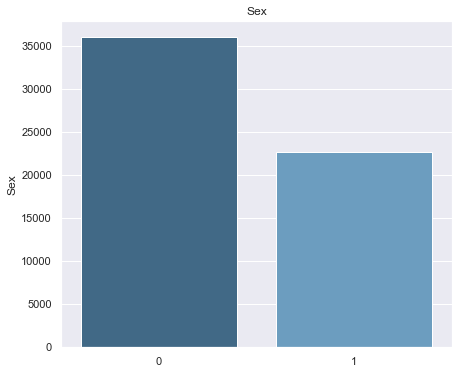



Marital status
0    35620
1    23073
Name: Marital status, dtype: int64


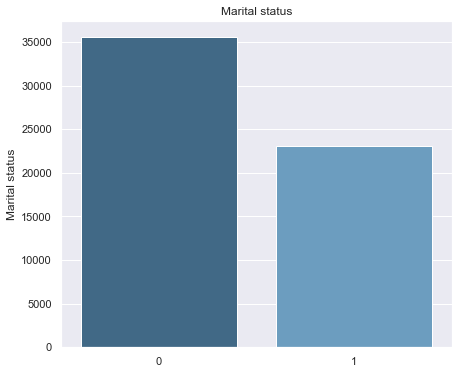



Education
1    37161
2    11716
0     8462
3     1354
Name: Education, dtype: int64


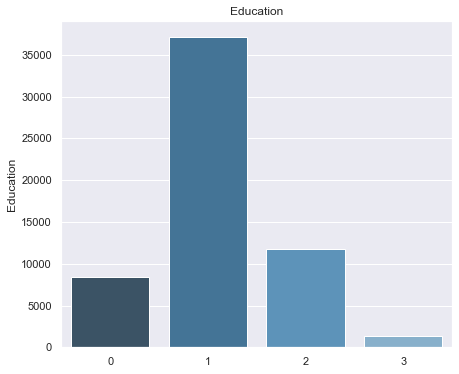



Occupation
1    29882
0    21032
2     7779
Name: Occupation, dtype: int64


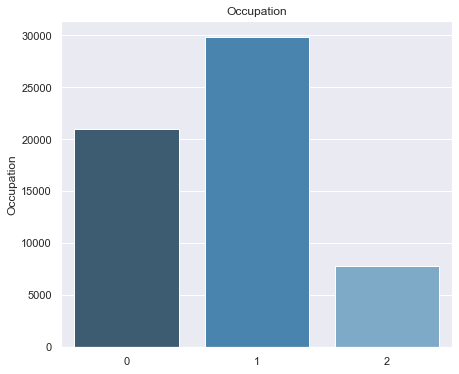



Settlement size
0    32081
1    14727
2    11885
Name: Settlement size, dtype: int64


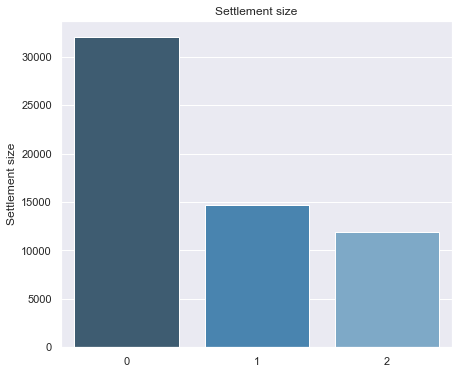

In [9]:
for col in categ_dmgr:
    plt.figure(figsize = (7, 6))
    print(col)
    print(df[col].value_counts())
    sns.barplot(x =df[col].value_counts().index , y= df[col].value_counts() ,palette="Blues_d" )
    plt.title(f'{col}')
    plt.show()
    print('\n')

Age


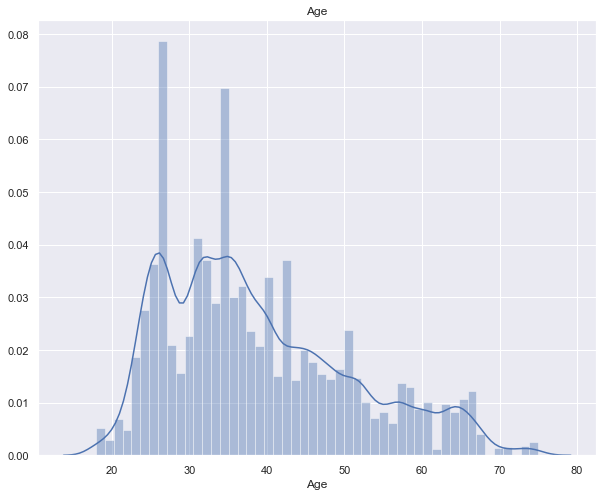



Income


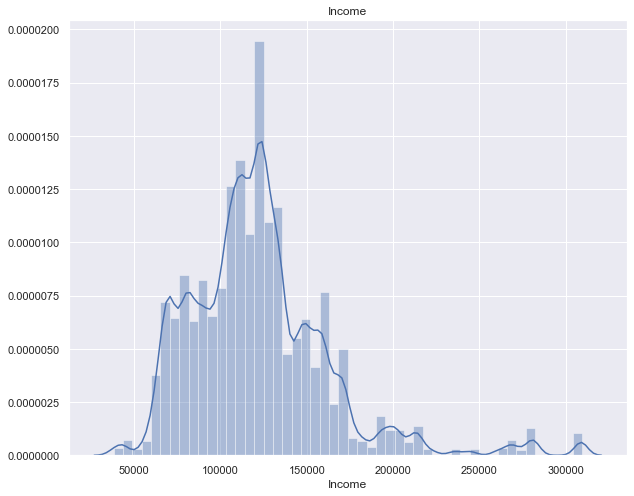

In [10]:
for col in num_dmgr:
    print(col)
    plt.figure(figsize = (10, 8))
    sns.distplot(df[col])
    plt.title(f'{col}')
    plt.show()
    print('\n')

## K-Means Clustering

### Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_segmentation = scaler.fit_transform(df_dmgr)


### Finding The Optimal Number of Clusters

In [12]:
from sklearn.cluster import KMeans
scores={}
rng_clus = 10
for i in range(1,rng_clus):
    kmeans = KMeans(i , init='k-means++')
    model = kmeans.fit(df_segmentation)
    scores[i] = model.inertia_
    
scores_df  = pd.DataFrame.from_dict(scores , orient = 'index' )

<Figure size 720x576 with 0 Axes>

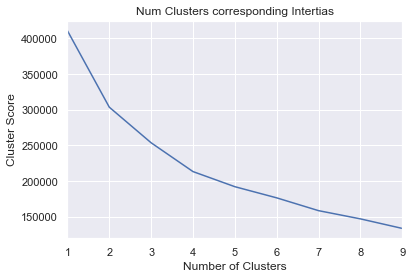

In [13]:
# Let us visualize the results
plt.figure(figsize = (10, 8))
scores_df.plot(title='Num Clusters corresponding Intertias' , legend =None)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()

**4 Clusters Seem optimal**

In [14]:
kmeans = KMeans(n_clusters=4 , init='k-means++')
kmeans.fit(df_segmentation)
df['segment'] = kmeans.labels_


### Visualizing the Clusters

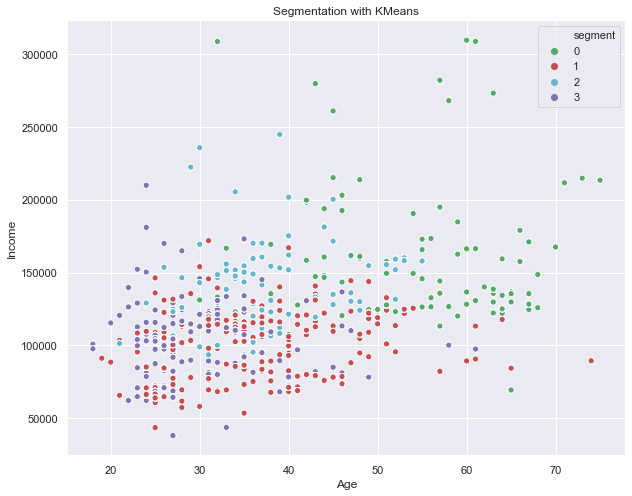

In [15]:
plt.figure(figsize = (10, 8))
sns_plot_clus = sns.scatterplot('Age','Income' , hue = 'segment' , data = df , palette = ['g', 'r', 'c', 'm'])
plt.title("Segmentation with KMeans")
plt.show()

- **As we can see Cluster One is clearly Segregated and cluster 1 is also (kinda), but 2 and 3 are mixed up**
- **Before We start Analyzing Clusters let us Perform Proper Clusters**
- **Let us try to perform  PCA in order to extract Latent Variables**


# PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(random_state=3)
pca.fit(df_segmentation)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=3,
    svd_solver='auto', tol=0.0, whiten=False)

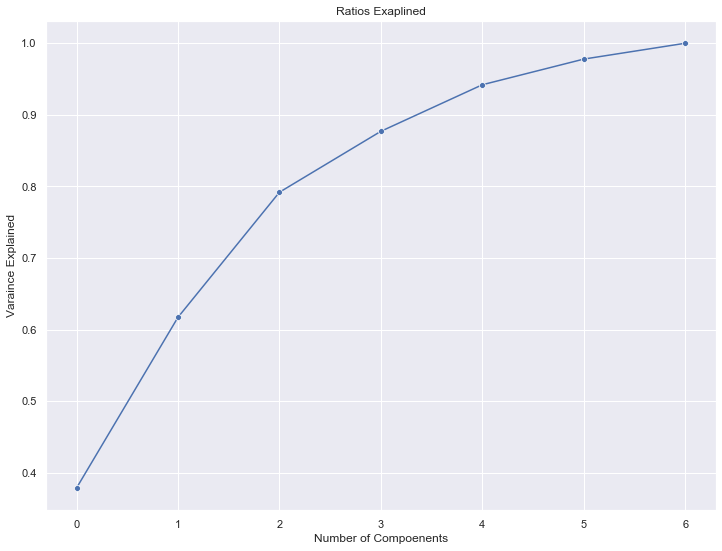

In [17]:
plt.figure(figsize = (12,9))
sns.lineplot(x =list(range(len(pca.explained_variance_ratio_)))  , y = pca.explained_variance_ratio_.cumsum() , marker = 'o')
plt.title("Ratios Exaplined")
plt.xlabel('Number of Compoenents')
plt.ylabel('Varaince Explained')
plt.show()

- **3 Components Seems optimal as it explains about 80% of variance**


In [18]:
pca = PCA(n_components=3 , random_state=9)
pca.fit(df_segmentation)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=9,
    svd_solver='auto', tol=0.0, whiten=False)

**Let's Analyze these components**

In [19]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_dmgr.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.044219,0.129980,0.383277,0.408239,0.514840,0.469535,0.426692
Component 2,0.627188,0.606626,0.018888,0.394983,-0.105629,-0.154097,-0.217642
Component 3,-0.188804,-0.317056,0.662721,0.405791,-0.160697,-0.399526,-0.272981


- **Each Component is one of the vectors onto which our 7 features are projected(projected such a way that linear relationships between our features are preserved as much as possible(~90%)**
- **So it gives us a scope to analyze what each component represents by analyzing there numerical value corresponding to each feature**

([<matplotlib.axis.YTick at 0x27558808488>,
 <a list of 3 Text yticklabel objects>)

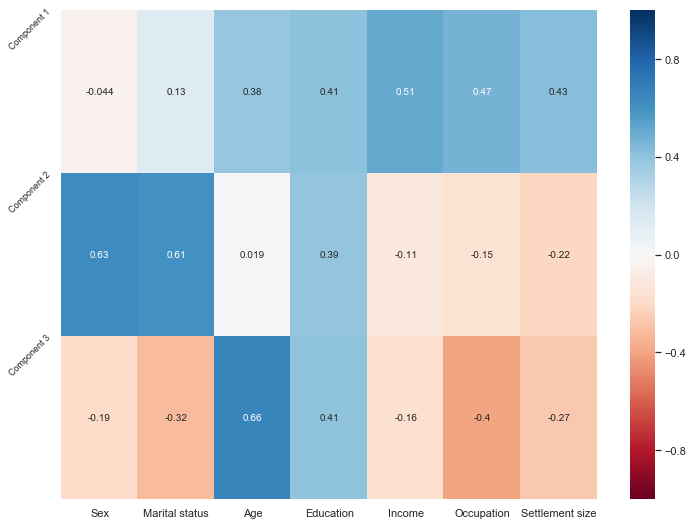

In [20]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize = (12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)

plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

**We can see above that our new latent variables(components) each of them represent some aspect of our demographic  features**

In [21]:
df_pca = pca.transform(df_segmentation)

In [22]:
df_pca = pd.DataFrame(df_pca , columns= ['comp1' , 'comp2', 'comp3'])

In [23]:
df= pd.concat([ df , df_pca], axis=1)


## Clustering on PCA components

**Finding Optimal CLusters**

In [24]:
from sklearn.cluster import KMeans
scores={}
rng_clus = 10
for i in range(1,rng_clus):
    kmeans = KMeans(i , init='k-means++')
    model = kmeans.fit(df_pca)
    scores[i] = model.inertia_
    
scores_df  = pd.DataFrame.from_dict(scores , orient = 'index' )

<Figure size 720x576 with 0 Axes>

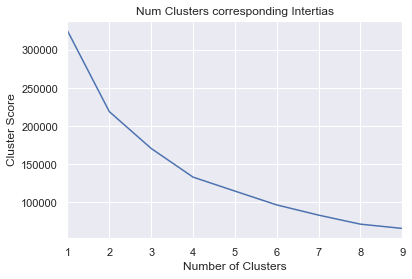

In [25]:
# Let us visualize the results
plt.figure(figsize = (10, 8))
scores_df.plot(title='Num Clusters corresponding Intertias' , legend =None)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Score')
plt.show()

**4 cluster still seems like an optimal number of clsuters**

In [26]:
kmeans = KMeans(n_clusters=4 , init='k-means++' , random_state=3)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [27]:
df['segment'] = kmeans.labels_

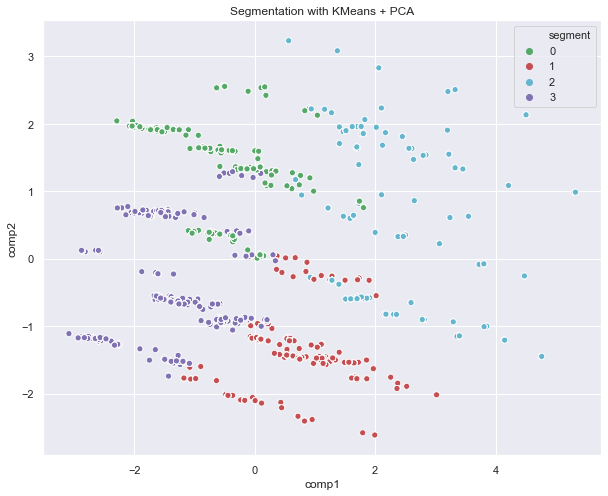

In [28]:
plt.figure(figsize = (10, 8))
sns_plot_ClusPca = sns.scatterplot(x =df_pca['comp1'] , y =df_pca['comp2']  , hue = df['segment'] , palette = ['g', 'r', 'c', 'm'])
plt.title("Segmentation with KMeans + PCA")
plt.show()

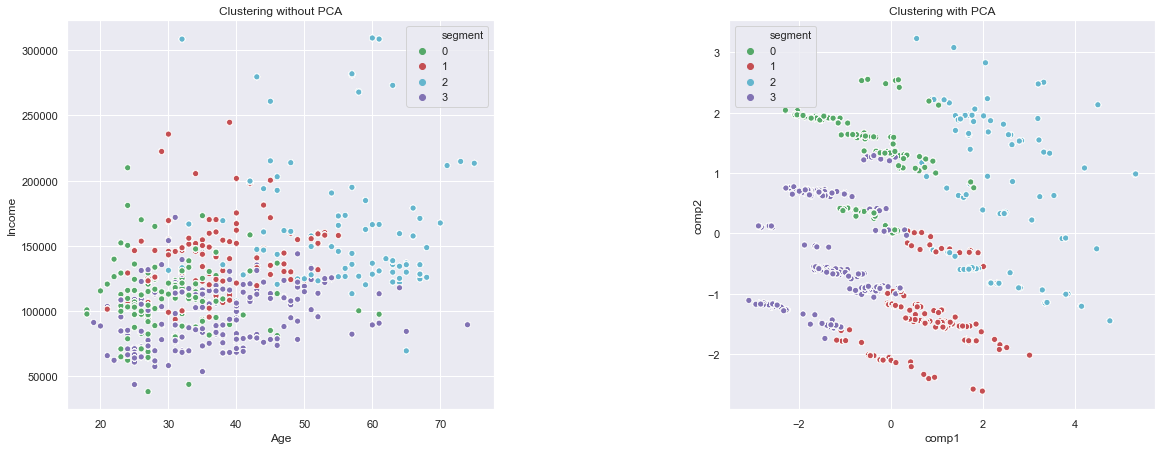

In [36]:

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(8)
fig.set_figwidth(20)

splot1 =  sns.scatterplot('Age','Income' , hue = 'segment' , data = df , palette = ['g', 'r', 'c', 'm'] , ax=axes[0])
axes[0].set_title("Clustering without PCA")


splot2 =sns.scatterplot(x =df_pca['comp1'] , y =df_pca['comp2']  , hue = df['segment'] , palette = ['g', 'r', 'c', 'm'], ax=axes[1])
axes[1].set_title("Clustering with PCA")



plt.show()
        

**As we can see clusters are much more clear**

## Cluster Analysis

In [57]:
df.head()


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Income,Occupation,Settlement size,segment,comp1,comp2,comp3,comp1,comp2,comp3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,110866,1,0,3,-0.203742,-0.878217,0.925728,-0.203742,-0.878217,0.925728
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,110866,1,0,3,-0.203742,-0.878217,0.925728,-0.203742,-0.878217,0.925728
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,110866,1,0,3,-0.203742,-0.878217,0.925728,-0.203742,-0.878217,0.925728
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,110866,1,0,3,-0.203742,-0.878217,0.925728,-0.203742,-0.878217,0.925728
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,110866,1,0,3,-0.203742,-0.878217,0.925728,-0.203742,-0.878217,0.925728


**Praportions of each categories segment wise**

In [58]:
df_segment_grpby = df.groupby('segment').mean()[dmgr]
df_segment_grpby

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,0.903591,0.865567,30.557583,1.084805,111048.877390,0.722011,0.409429
1,0.000000,0.145252,38.271266,0.820907,140388.036081,1.280924,1.473692
2,0.464475,0.671088,54.881110,2.116427,164550.370500,1.267052,1.200549
3,0.249628,0.104644,36.458403,0.782849,96576.579658,0.260236,0.053043


**Let us compare certain statsitics of our dataset to each segment so that we can put the numbers in context relative to the dataset**

### Segment-0

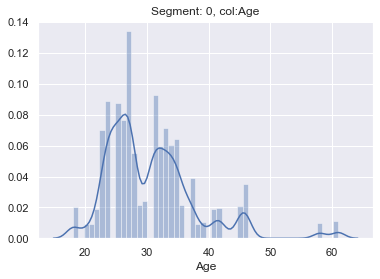

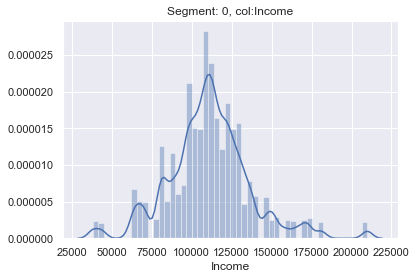

In [32]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==0][col])
    plt.title(f'Segment: 0, col:{col}')
    plt.show()
    print('\n')
        

ValueError: min() arg is an empty sequence

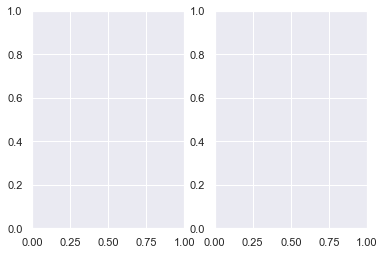

<Figure size 720x576 with 0 Axes>

In [100]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.figure(figsize = (10, 8))
    
    sns.barplot( x=df[df['segment']==0][col].value_counts().index  , y=df[df['segment']==0][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 0- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()


In [59]:
df_segment_grpby.iloc[0,:]

Sex                     0.903591
Marital status          0.865567
Age                    30.557583
Education               1.084805
Income             111048.877390
Occupation              0.722011
Settlement size         0.409429
Name: 0, dtype: float64

In [60]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


**Most of them are married, but not so old, well educated , moderate income and occupation, settlement sizes are representative of the data set, so let us name them <i> Wholesome</i>**

### Segement-1

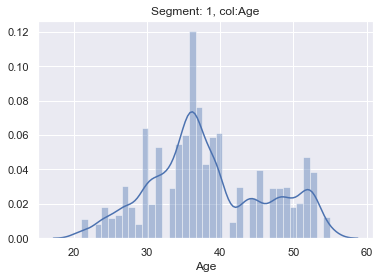

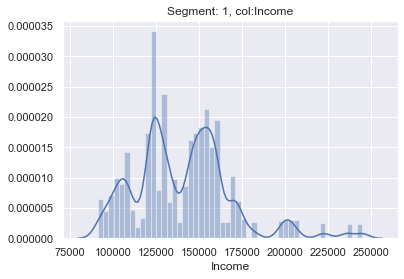

In [61]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==1][col])
    plt.title(f'Segment: 1, col:{col}')
    plt.show()
    print('\n')
        

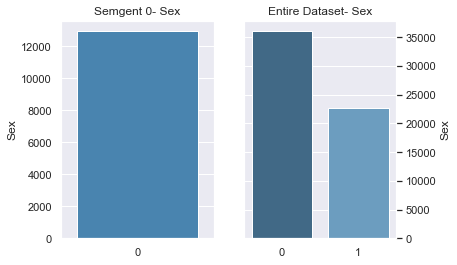

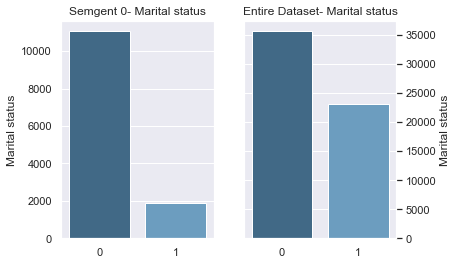

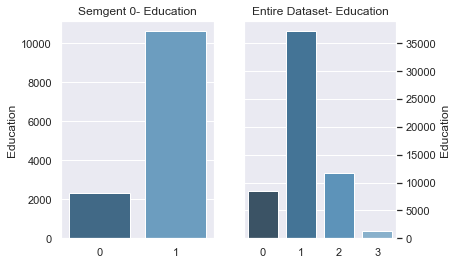

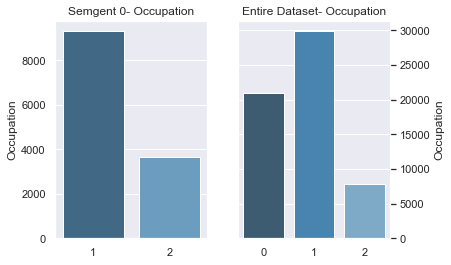

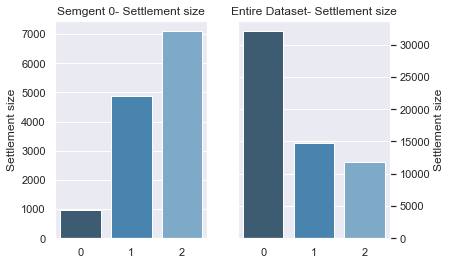

In [63]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==1][col].value_counts().index  , y=df[df['segment']==1][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 1- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()
        

In [64]:
df_segment_grpby.iloc[1,:]

Sex                     0.000000
Marital status          0.145252
Age                    38.271266
Education               0.820907
Income             140388.036081
Occupation              1.280924
Settlement size         1.473692
Name: 1, dtype: float64

In [65]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


**Despite of being not highly educated they have considerably well payed and have a high settlement size score and most of them are unmarried let's call them <i>urbanites</i>**

### Segment-2

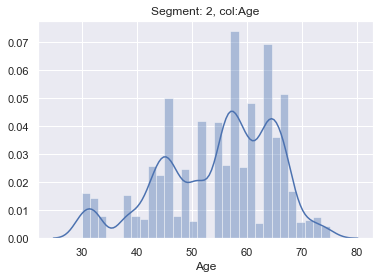

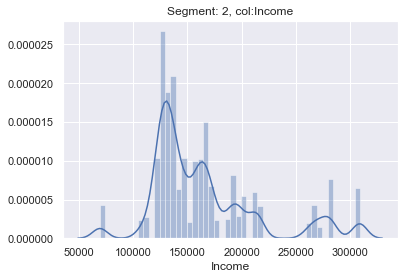

In [66]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==2][col])
    plt.title(f'Segment: 2, col:{col}')
    plt.show()
    print('\n')
        

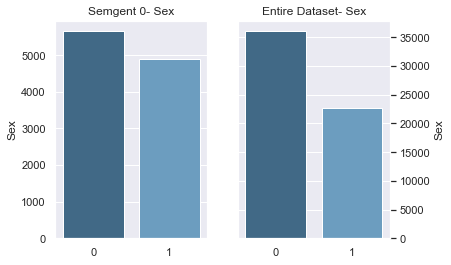

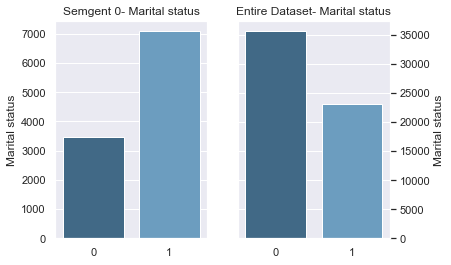

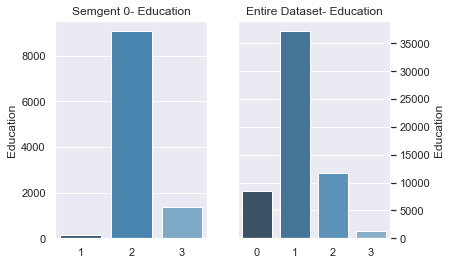

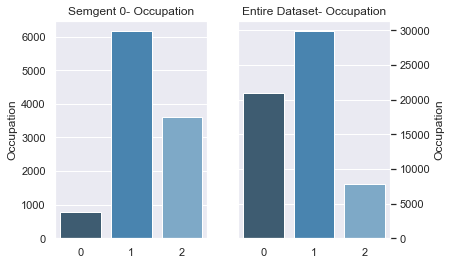

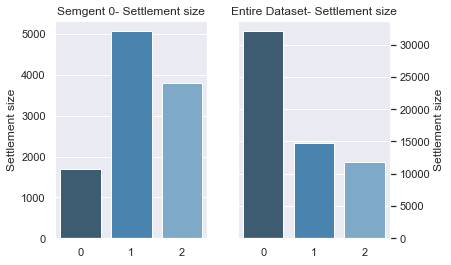

In [68]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==2][col].value_counts().index  , y=df[df['segment']==2][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 2- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [69]:
df_segment_grpby.iloc[2,:]

Sex                     0.464475
Marital status          0.671088
Age                    54.881110
Education               2.116427
Income             164550.370500
Occupation              1.267052
Settlement size         1.200549
Name: 2, dtype: float64

In [70]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


**As we can see most of the people are older, have high education, good pay and have relatively good occupation and live in better settlement size, Let us call them <i> veterans </i>**


### Segement-3

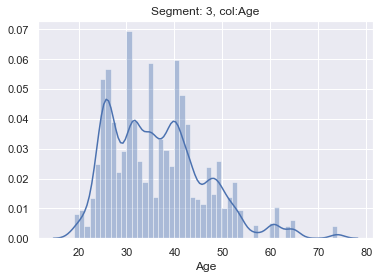

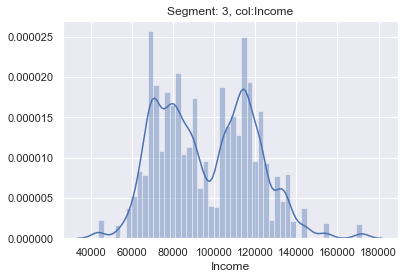

In [71]:
for col in num_dmgr:
    sns.distplot(df[df['segment']==3][col])
    plt.title(f'Segment: 3, col:{col}')
    plt.show()
    print('\n')
        

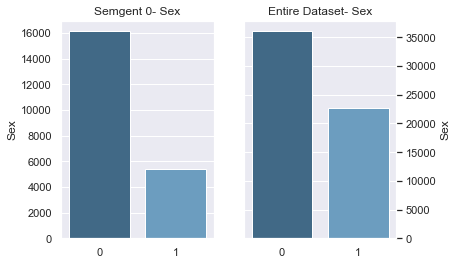

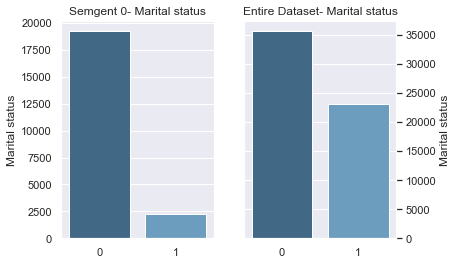

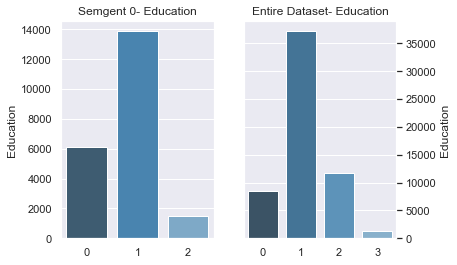

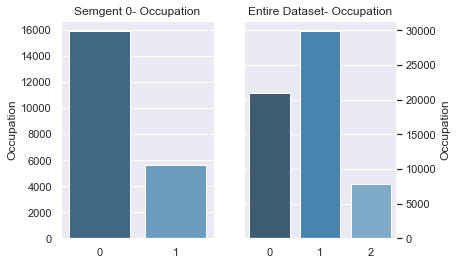

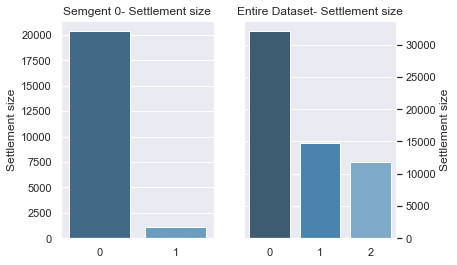

In [72]:
for col in categ_dmgr:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    sns.barplot( x=df[df['segment']==3][col].value_counts().index  , y=df[df['segment']==3][col].value_counts() , ax=axes[0] ,palette="Blues_d" )
    axes[0].set_title(f'Semgent 3- {col}')
    sns.barplot(x = df[col].value_counts().index , y = df[col].value_counts() ,   ax=axes[1], palette="Blues_d")
    axes[1].set_title(f'Entire Dataset- {col}')
    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

In [73]:
df_segment_grpby.iloc[3,:]

Sex                    0.249628
Marital status         0.104644
Age                   36.458403
Education              0.782849
Income             96576.579658
Occupation             0.260236
Settlement size        0.053043
Name: 3, dtype: float64

In [74]:
df[dmgr].describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


**As we can see most of them are comparably low income have occupation of lower degree and less education, let's call this segment <i> Working Class </i>**



**Naming Cluster accordingly**


In [75]:
seg_name={
    3:"Working Class",
2:"veterans",
1: "urbanites",
0: "Wholesome"
    
}

In [76]:
df['segment'] = df['segment'].map(seg_name)

# EDA
**Insights we are seeking to get out of the analysis is to understand the purchasing patterns of the segments, Which would Answer Questions such as**
- **Which Segment has more monetary value**
- **Which Segment Purchases more often**
- **Which Brands do each segment prefer more often**
- **Who are the most valuable customers(Overall and to each brand) and which segment do they belong to**


In [77]:
df_org = pd.read_csv("data/segmentation-complete.csv")

In [78]:
df = df_org.copy()

In [81]:
df.tail()

,Unnamed: 0,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,...,Marital status,Age,Education,Income,Occupation,Settlement size,segment,comp1,comp2,comp3
58688,58688,200000500,703,0,0,0,2,1,1.41,1.85,...,0,42,1,120946,1,0,Working Class,-0.235061,-0.91225,0.610939
58689,58689,200000500,710,0,0,0,0,0,1.36,1.84,...,0,42,1,120946,1,0,Working Class,-0.235061,-0.91225,0.610939
58690,58690,200000500,717,0,0,0,0,0,1.50,1.80,...,0,42,1,120946,1,0,Working Class,-0.235061,-0.91225,0.610939
58691,58691,200000500,722,1,2,3,0,0,1.51,1.82,...,0,42,1,120946,1,0,Working Class,-0.235061,-0.91225,0.610939
58692,58692,200000500,726,0,0,0,2,1,1.51,1.82,...,0,42,1,120946,1,0,Working Class,-0.235061,-0.91225,0.610939


- We will get the total amount spent by each customer
- We will create dummy variables for the brand as it will make it easy for us to compute aggregates later

In [82]:
df["spent"] = 0.0
for i in range(len(df)):
    if(df['Incidence'][i]==1):
        brand = int(df['Brand'][i])
        df["spent"][i] = int( df["Quantity"][i] )* ( df["Price_"+str(brand)][i] )
    else:
        pass
    
    

C:\Users\saima\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [83]:
df_proc = pd.concat([df , pd.get_dummies(df["Brand"],  prefix = "Brand", prefix_sep = "_").drop("Brand_0" , axis=1)], axis=1)
     


In [84]:
df_proc.head()

,Unnamed: 0,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,...,segment,comp1,comp2,comp3,spent,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
0,0,200000001,1,0,0,0,0,0,1.59,1.87,...,Working Class,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0
1,1,200000001,11,0,0,0,0,0,1.51,1.89,...,Working Class,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0
2,2,200000001,12,0,0,0,0,0,1.51,1.89,...,Working Class,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0
3,3,200000001,16,0,0,0,0,0,1.52,1.89,...,Working Class,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0
4,4,200000001,18,0,0,0,0,0,1.52,1.89,...,Working Class,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0


In [85]:
df_proc.groupby(["ID"]).sum()["Brand_1"]

ID
200000001    1.0
200000002    0.0
200000003    0.0
200000004    0.0
200000005    0.0
            ... 
200000496    1.0
200000497    1.0
200000498    5.0
200000499    2.0
200000500    2.0
Name: Brand_1, Length: 500, dtype: float64

### **Calculating summary of each individual which would help us during RFM analysis**

In [86]:
df_id = pd.DataFrame(index=df["ID"].unique())

In [87]:
df_id["num_visits"]  =  df.groupby(["ID"]).count()['Unnamed: 0']
df_id["num_purchases"]   = df.groupby(["ID"]).sum()["Incidence"]
df_id["brand_one_purch"]  =  df_proc[df_proc["Brand"]==1].groupby("ID").sum()["spent"]
df_id["brand_two_purch"]  =   df_proc[df_proc["Brand"]==2].groupby("ID").sum()["spent"]
df_id["brand_three_purch"]  =  df_proc[df_proc["Brand"]==3].groupby("ID").sum()["spent"]
df_id["brand_four_purch"]   = df_proc[df_proc["Brand"]==4].groupby("ID").sum()["spent"]
df_id["brand_five_purch"]  =  df_proc[df_proc["Brand"]==5].groupby("ID").sum()["spent"]
df_id["toal_purchase_value"] = df_proc.groupby("ID").sum()["spent"]

In [88]:
df_id.head()

,num_visits,num_purchases,brand_one_purch,brand_two_purch,brand_three_purch,brand_four_purch,brand_five_purch,toal_purchase_value
200000001,101,9,2.94,17.75,NaN,7.86,5.41,33.96
200000002,87,11,NaN,4.71,NaN,37.03,NaN,41.74
200000003,97,10,NaN,27.34,NaN,NaN,4.93,32.27
200000004,85,11,NaN,1.57,NaN,NaN,31.39,32.96
200000005,111,13,NaN,NaN,NaN,NaN,54.97,54.97


### **Calculating summary of segment wise**

In [89]:
df_seg = pd.DataFrame(index=df_proc["segment"].unique())

In [90]:
df_proc.columns

Index(['Unnamed: 0', 'ID', 'Day', 'Incidence', 'Brand', 'Quantity',
       'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'segment',
       'comp1', 'comp2', 'comp3', 'spent', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5'],
      dtype='object')

In [91]:
df_proc["promotion_status"] = (df_proc["Promotion_1"] |df_proc["Promotion_2"]|df_proc["Promotion_3"]|df_proc["Promotion_4"]|df_proc["Promotion_5"])


In [92]:
df_seg["num_people"] =  df_proc.groupby(['segment', 'ID']).count().groupby(["segment"]).count()["Unnamed: 0"]
df_seg["num_visits"]  =  df_proc.groupby(["segment"]).count()['Unnamed: 0']
df_seg["num_purchases"]   = df_proc.groupby(["segment"]).sum()["Incidence"]
df_seg["brand_one_purch"]  =  df_proc[df_proc["Brand"]==1].groupby("segment").sum()["spent"]
df_seg["brand_two_purch"]  =  df_proc[df_proc["Brand"]==2].groupby("segment").sum()["spent"]
df_seg["brand_three_purch"]  =  df_proc[df_proc["Brand"]==3].groupby("segment").sum()["spent"]
df_seg["brand_four_purch"]   = df_proc[df_proc["Brand"]==4].groupby("segment").sum()["spent"]
df_seg["brand_five_purch"]  =  df_proc[df_proc["Brand"]==5].groupby("segment").sum()["spent"]
df_seg["total_purchase_value"] = df_proc.groupby('segment').sum()["spent"]

df_seg["purch_per_visit"] = df_seg["total_purchase_value"]/df_seg["num_visits"]

df_seg["purch_per_person"] = df_seg["total_purchase_value"]/df_seg["num_people"] 
df_seg["visit_per_person"] = df_seg["num_visits"] /df_seg["num_people"]
df_seg["brand_one_purch_per_person"] =  df_seg["brand_one_purch"] /df_seg["num_people"]
df_seg["brand_two_purch_per_person"] =  df_seg["brand_two_purch"] /df_seg["num_people"]
df_seg["brand_three_purch_per_person"] =  df_seg["brand_three_purch"] /df_seg["num_people"]
df_seg["brand_four_purch_per_person"] =  df_seg["brand_four_purch"] /df_seg["num_people"]
df_seg["brand_five_purch_per_person"] =  df_seg["brand_five_purch"] /df_seg["num_people"]
  
df_seg["promotion_1"] = df_proc[df_proc["promotion_status"]==1].groupby('segment').sum()["spent"]/df_seg["num_people"] 
df_seg["promotion_0"] = df_proc[df_proc["promotion_status"]==0].groupby('segment').sum()["spent"] /df_seg["num_people"] 

**Performing standard scaling so that we don't focus on the actual numbers but the order**

In [93]:
standardize_seg= (df_seg- df_seg.min())/(df_seg.max()- df_seg.min())

Text(0.5, 1, 'Segment heatmap')

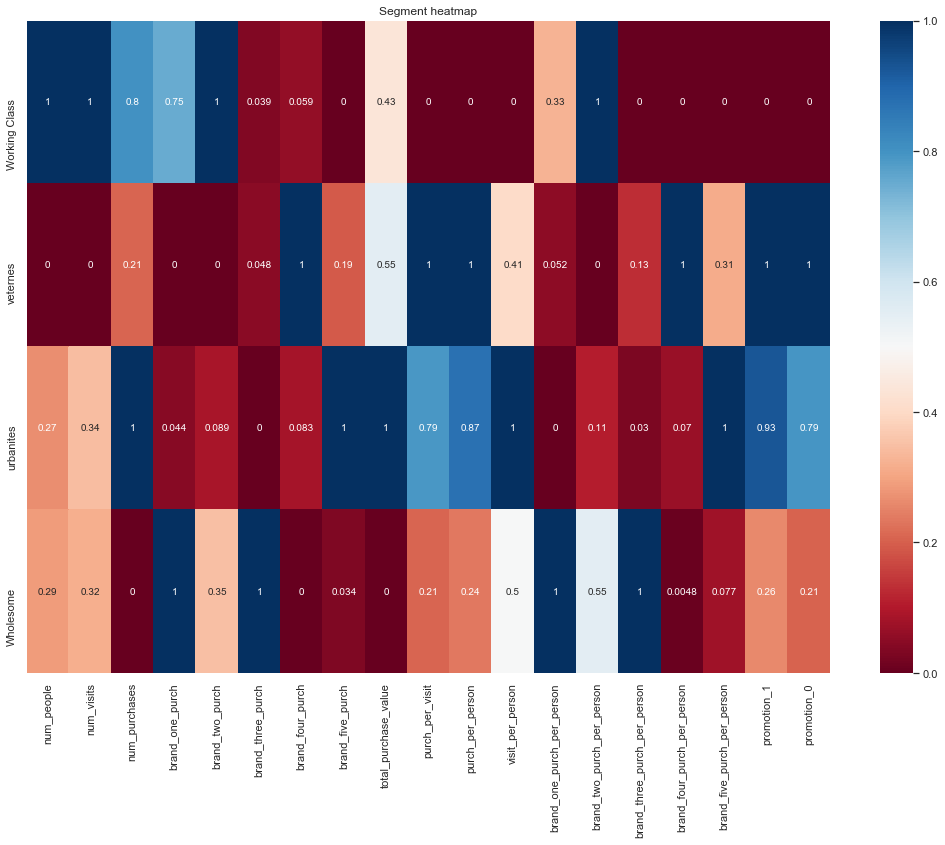

In [95]:
plt.figure(figsize = (18,12))
sns.heatmap( standardize_seg,
            vmin = 0, 
            vmax = 1,
             cmap = 'RdBu',
            annot = True)
plt.title("Segment heatmap")


**Let us explore each one of them**

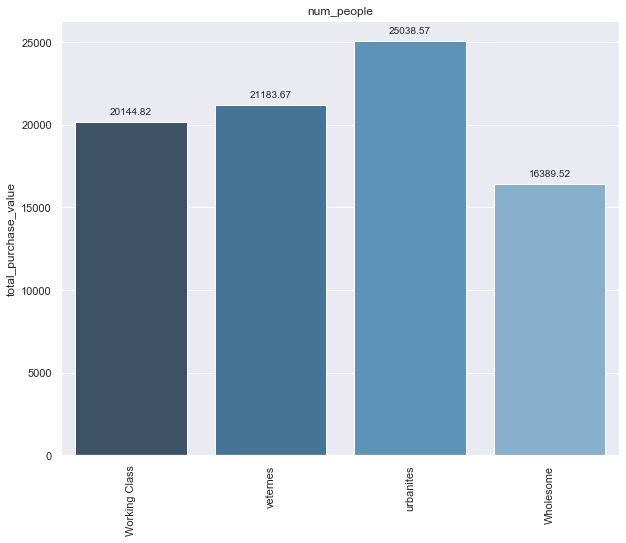

In [101]:
plt.figure(figsize = (10, 8))
splot = sns.barplot(x =df_seg.index.values , y = df_seg["total_purchase_value"], palette="Blues_d")
plt.title("Total Purchase Value")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot.get_xticklabels(), rotation=90)
plt.show()

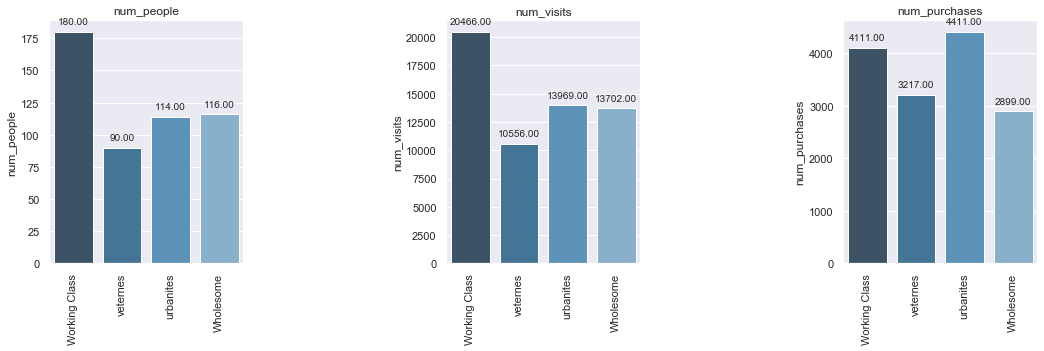

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=3.5)
fig.set_figheight(5)
fig.set_figwidth(18)


splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["num_people"] , ax=axes[0] , palette="Blues_d")
axes[ 0].set_title("num_people")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)


splot2 = sns.barplot(x =df_seg.index.values , y = df_seg["num_visits"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("num_visits")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)



splot3 = sns.barplot(x =df_seg.index.values , y = df_seg["num_purchases"] , ax=axes[2] , palette="Blues_d")
axes[ 2].set_title("num_purchases")
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot3.get_xticklabels(), rotation=90)





plt.show()
        

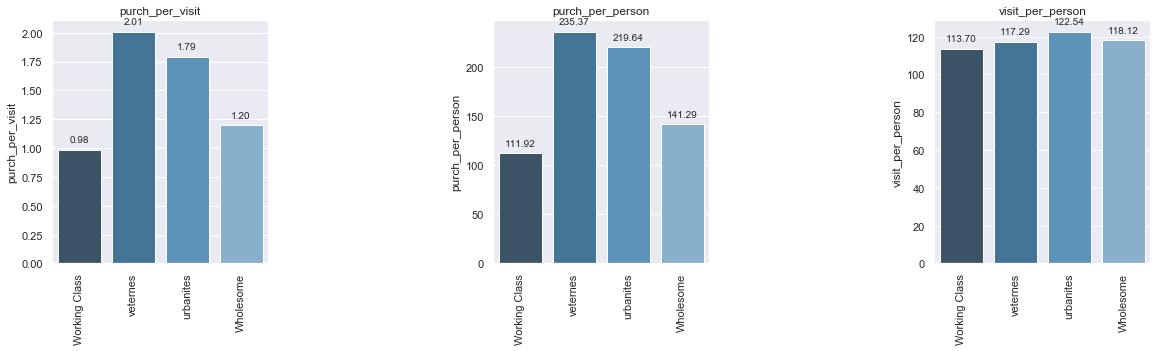

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=3.5)
fig.set_figheight(5)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["purch_per_visit"] , ax=axes[0] , palette="Blues_d")
axes[ 0].set_title("purch_per_visit")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)


splot2 = sns.barplot(x =df_seg.index.values , y = df_seg["purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)



splot3 = sns.barplot(x =df_seg.index.values , y = df_seg["visit_per_person"] , ax=axes[2] , palette="Blues_d")
axes[ 2].set_title("visit_per_person")
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot3.get_xticklabels(), rotation=90)







plt.show()
        

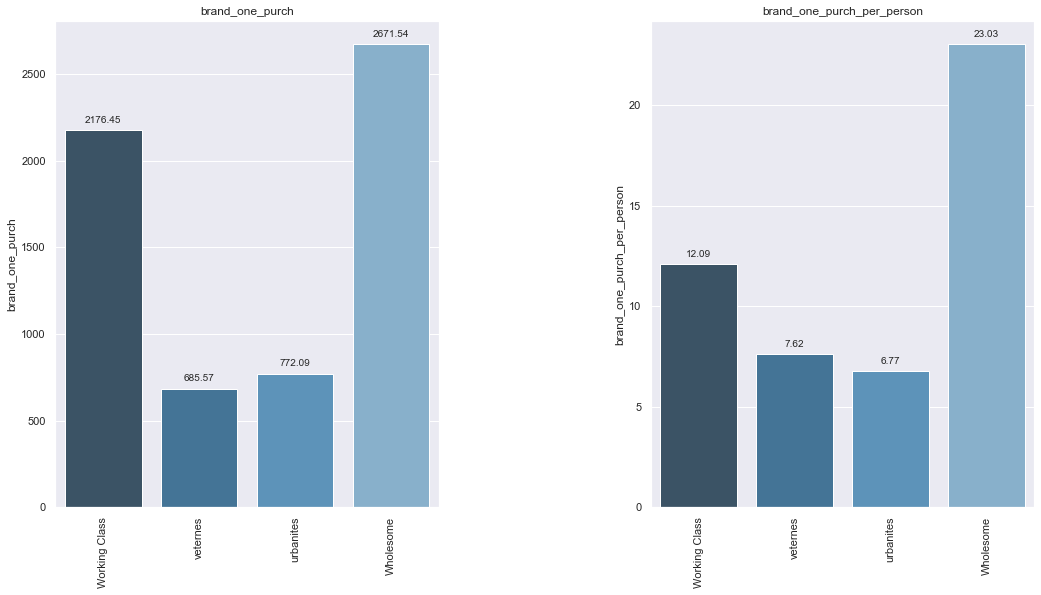

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["brand_one_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_one_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y =  df_seg["brand_one_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_one_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

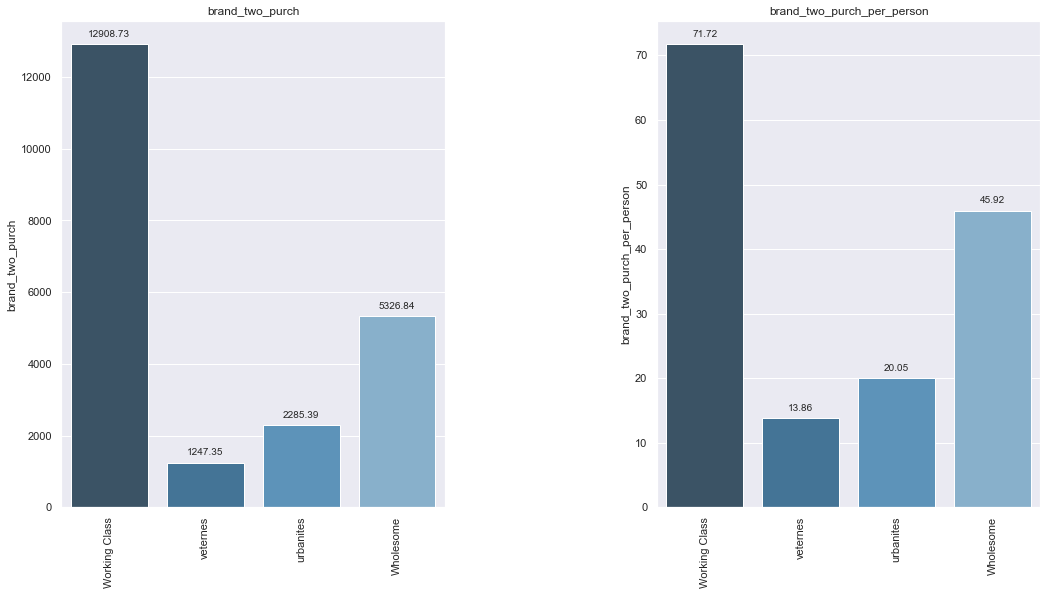

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["brand_two_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_two_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y =  df_seg["brand_two_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_two_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

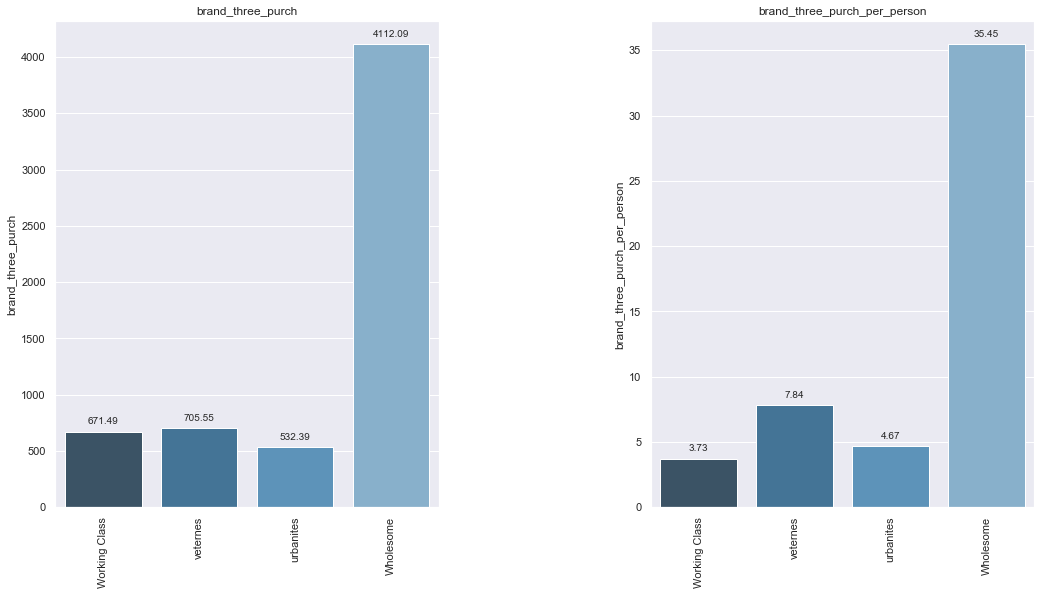

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["brand_three_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_three_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y =  df_seg["brand_three_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_three_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

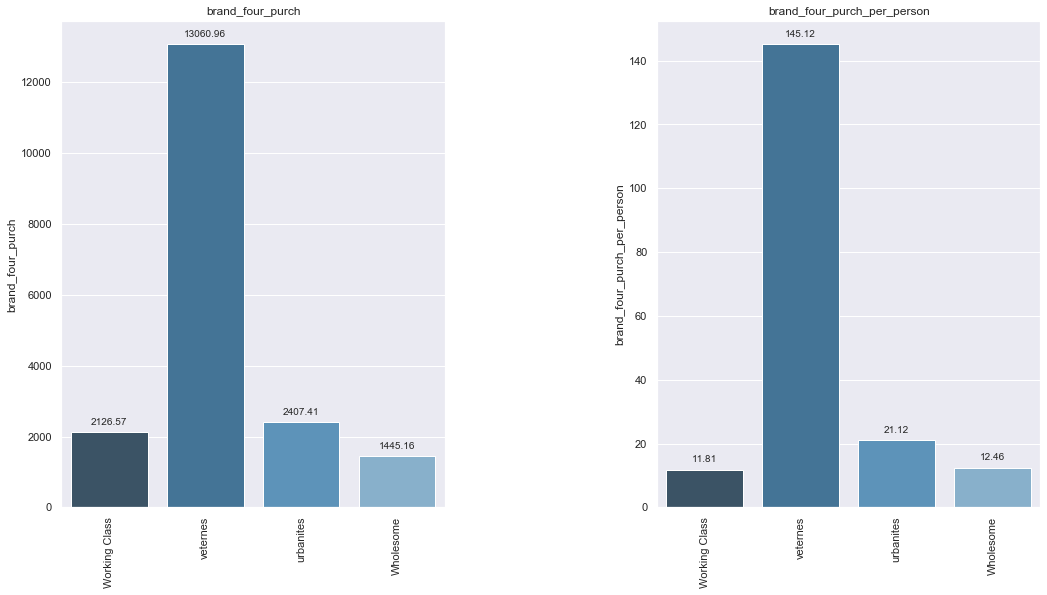

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["brand_four_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_four_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y =  df_seg["brand_four_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_four_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

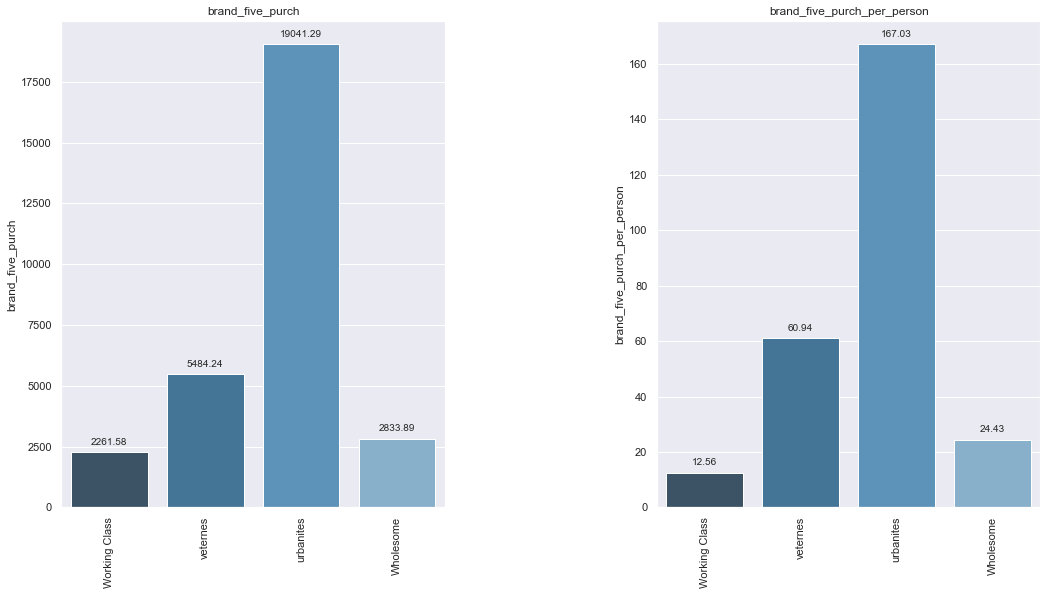

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg["brand_five_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_five_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y =  df_seg["brand_five_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_five_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

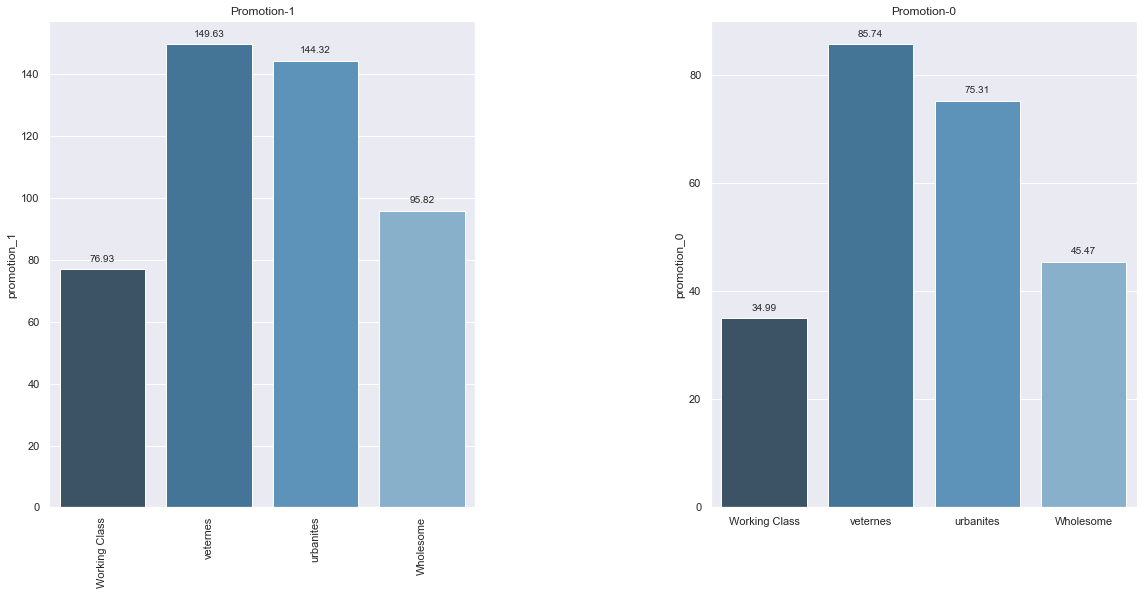

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_seg.index.values , y = df_seg['promotion_1'], ax=axes[0] , palette="Blues_d")
axes[0].set_title("Promotion-1")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg.index.values , y = df_seg['promotion_0'], ax=axes[1] , palette="Blues_d")
axes[1].set_title("Promotion-0")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)




plt.show()
        

## Observations
**Using both the dataframe and above heatmap**

- **Urban people generate more revenue for candy bars sales and working class purchase the least(makes sense), whats surprising is veterans(we assume them to be older) spend more than wholesome(actually this isn't that surprising either because we gave these labels and if we inspect the age distribution of veterans there are a lot of people in that segment who are young**

- **As we can see there are more number of people in the working class and veterans are least(Thats True even in real life)**

- **Since the number of people are more, number of visits are also more for working class(although they are not significantly more)**

- **Number of purchases are more for urbanites(this is also kind of expected as people living in urban settlements(considering other factors of segment) would spend more on candy, Whats surprising is it's more even though number of people are less than working class**

- **Purchases per visit and purchase per person are more for veterans(may be because they buy in stocks, like during discounts)**

**As we know brands numbers are in the order of their price**

- **Most revenue for Brand-1 is from wholesome segment of people**
- **Most revenue for Brand-2 is from working class segment of people**
- **Most revenue for Brand-3 is from wholesome segment of people**
- **Most revenue for Brand-4 is from veterans segment of people**
- **Most revenue for Brand-5 is from urban segment of people**


### **Note**: 
- **Names of the segments are just labels there are not entirely representative of the people in that segment, so we shouldn't look to enforce our insights onto what those labels mean**
- **For that matter of fact we can get a insight into how homogeneous a segment is by observing their variance or standard deviation**

In [110]:
df_seg_std = df_proc.groupby(['segment']).std()[['Age', 'Education',"Income",'Occupation', 'Settlement size', 'spent']]
df_seg_std

,Age,Education,Income,Occupation,Settlement size,spent
segment,,,,,,
Wholesome,7.320237,0.278602,25650.612784,0.528174,0.621319,2.759092
Working Class,9.671622,0.566029,21894.538013,0.422981,0.208382,2.318283
urbanites,8.190305,0.372039,27311.293427,0.463769,0.700315,3.623228
veternes,10.294819,0.355762,50801.185225,0.587424,0.692823,3.899631


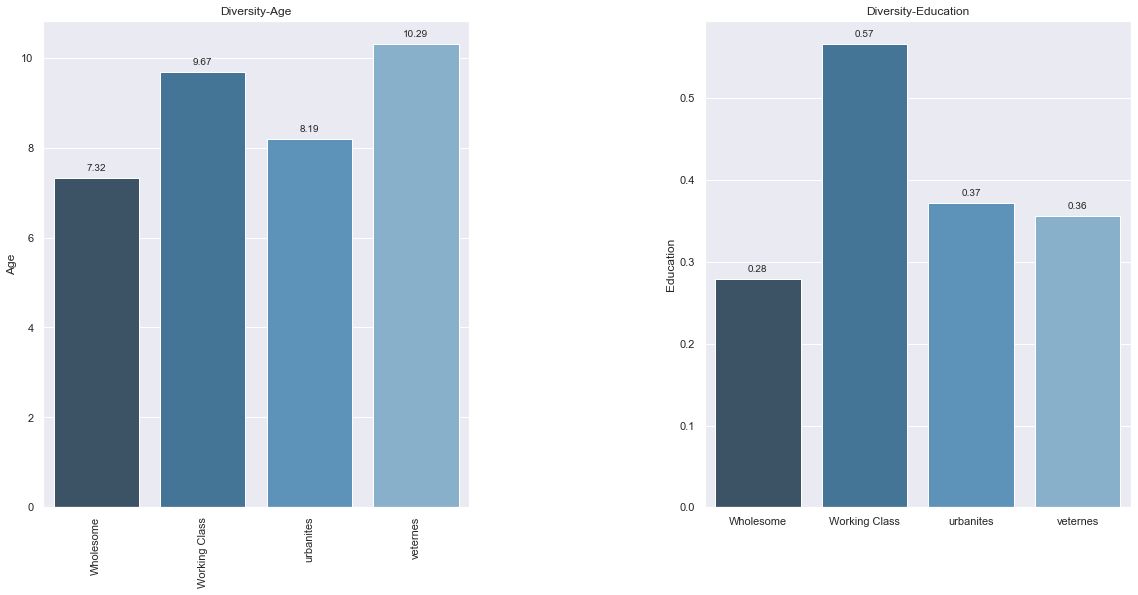

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['Age'], ax=axes[0] , palette="Blues_d")
axes[0].set_title("Diversity-Age")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['Education'], ax=axes[1] , palette="Blues_d")
axes[1].set_title("Diversity-Education")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)




plt.show()
        

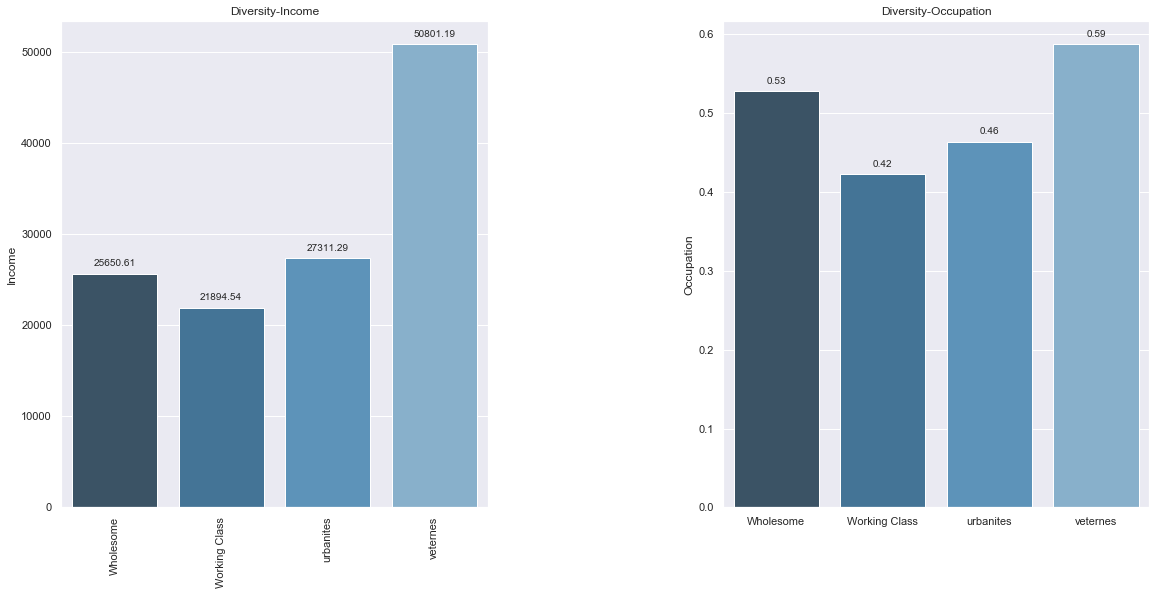

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['Income'], ax=axes[0] , palette="Blues_d")
axes[0].set_title("Diversity-Income")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['Occupation'], ax=axes[1] , palette="Blues_d")
axes[1].set_title("Diversity-Occupation")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)




plt.show()
        

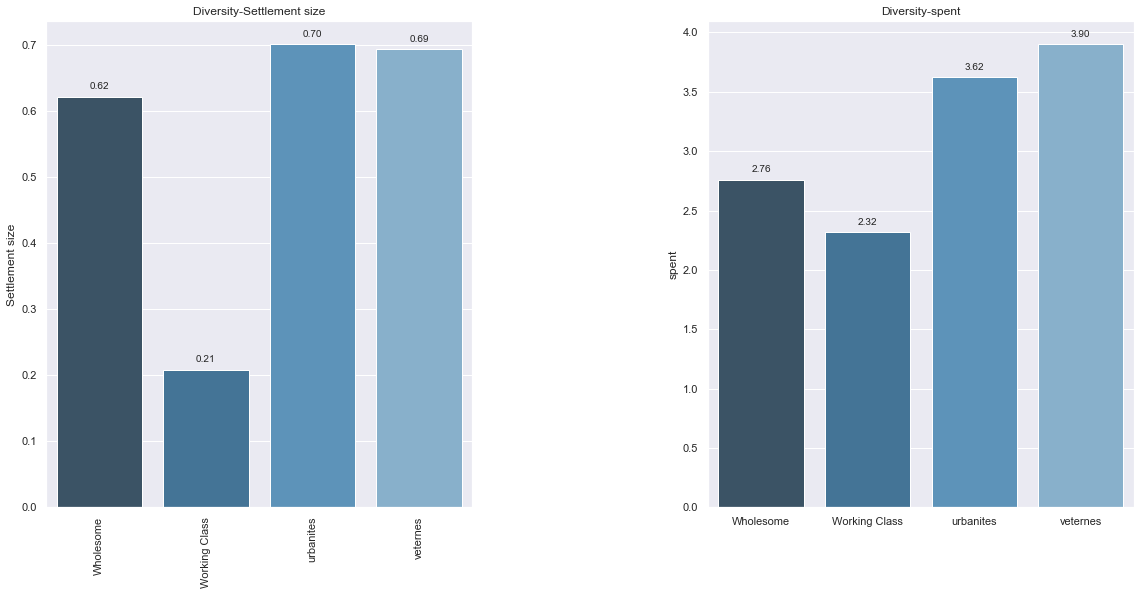

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['Settlement size'], ax=axes[0] , palette="Blues_d")
axes[0].set_title("Diversity-Settlement size")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_seg_std.index.values , y = df_seg_std['spent'], ax=axes[1] , palette="Blues_d")
axes[1].set_title("Diversity-spent")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)




plt.show()
        

- **As we can see veterans are quite a diverse set of people(probably veterans isn't a good name(representative) after all, but as said above it's just a label actual decisions wouldn't be taken based on the name of the cluster segment(as we shall see below)**
- **Above insights may assist marketing team of corresponding brands to tailor promotions and advertisements which each of the segment may find appealing** 


# RFM Analysis



**It helps a store to segment custiomers on the basis of their purchase patterns**


RFM Stands for (Recency Frequency and Monetary), We have all the information to carry out the Analysis except for Dates but as we know the data was collected in the span of two years and days on which there has been a visit has been provided so the last day would be 730th day, let's assume recency is being calculated for the first of third year which would be 731'st day 

In [114]:
from datetime import datetime

df_rfm =  pd.DataFrame( index =  df["ID"].unique())
df_rfm.index.name= 'customer_id'

In [115]:
df_proc.head()

,Unnamed: 0,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,...,comp1,comp2,comp3,spent,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,promotion_status
0,0,200000001,1,0,0,0,0,0,1.59,1.87,...,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0,1
1,1,200000001,11,0,0,0,0,0,1.51,1.89,...,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0,0
2,2,200000001,12,0,0,0,0,0,1.51,1.89,...,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0,0
3,3,200000001,16,0,0,0,0,0,1.52,1.89,...,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0,0
4,4,200000001,18,0,0,0,0,0,1.52,1.89,...,-0.203742,-0.878217,0.925728,0.0,0,0,0,0,0,0


In [116]:
df_rfm["Recency"] = 731 - df_proc.groupby("ID").max()["Day"]
df_rfm["Frequency"] = df_id["num_purchases"]
df_rfm["Monetary"] =  df_id["toal_purchase_value"]

In [117]:
df_rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
200000001,4,9,33.96
200000002,2,11,41.74
200000003,7,10,32.27
200000004,6,11,32.96
200000005,2,13,54.97


In [118]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [119]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [120]:

df_rfm['rec_score'] = df_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
df_rfm['freq_score'] = df_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
df_rfm['mon_score'] = df_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [121]:
df_rfm.head()

,Recency,Frequency,Monetary,rec_score,freq_score,mon_score
customer_id,,,,,,
200000001,4,9,33.96,3,1,1
200000002,2,11,41.74,4,1,1
200000003,7,10,32.27,2,1,1
200000004,6,11,32.96,2,1,1
200000005,2,13,54.97,4,1,1


In [122]:
df_seg_rfm = pd.DataFrame(index= df["ID"].unique())
df_seg_rfm["rfm_segment"] = np.nan

In [123]:
def get_segment(rec , freq, mon):
    
    if(4<=rec<=5 and  4<=freq<=5 and 4<=mon<=5 ):
        return "Champions"
    
    elif(2<=rec<=5 and 3<=freq<=5and 3<=mon<=5):
        return "Loyal Customers"
    
    elif(3<=rec<=5 and 1<=freq<=3  and 1<=mon<=3):
        return "Potential Loyalist"

    elif(4<=rec<=5 and 0<=freq<=1 and 0<= mon<=1 ):
        return "Recent Customers"

    elif(3<=rec<=4 and 0<=freq<=1 and 0<= mon<=1 ):
        return "Promising"

    elif(2<=rec<=3 and 2<=freq<=3 and 2<= mon<=3 ):
        return "Customers Needing Attention"

    elif(2<=rec<=3 and 0<=freq<=2 and 0<= mon<=2 ):
        return "About To Sleep"

    elif( 0<=rec<=2 and 2<=freq<=5 and 2<= mon<=5 ):
        return "At Risk"

    elif( 0<=rec<=1 and 4<=freq<=5 and 4<= mon<=5 ):
        return "Can’t Lose Them"

    elif( 1<=rec<=2 and 1<=freq<=2 and 1<= mon<=2 ):
        return "Hibernating"


    elif( 0<=rec<=2 and 0<=freq<=2 and 0<= mon<=2 ):
        return "Lost"



In [124]:
for i in df_seg_rfm.index.values:
    df_seg_rfm["rfm_segment"][i] = get_segment(df_rfm["rec_score"][i] , df_rfm["freq_score"][i], df_rfm["mon_score"][i])
    

In [125]:
# adding a duplicate column so that we could perform groupby operations
df_seg_rfm["Dummy"] = 0

**Unlike previous segments these names are not arbitrary RFM analysis is been in the industry(marketing and customer analytics) for a considerable period of time so it's been well researched and implemented, and following are the descriptions of each of the segments**

![title](images/rfm.PNG)
<i>[source](https://www.putler.com/rfm-analysis/)</i>



**Number of people in each segment**

In [126]:
df_seg_rfm.groupby(["rfm_segment"]).count()

,Dummy
rfm_segment,
About To Sleep,29
At Risk,93
Champions,24
Customers Needing Attention,18
Hibernating,29
Loyal Customers,122
Potential Loyalist,181


In [127]:
 df_proc.groupby("ID").max()["segment"]

ID
200000001    Working Class
200000002         veternes
200000003    Working Class
200000004    Working Class
200000005        urbanites
                 ...      
200000496        Wholesome
200000497    Working Class
200000498        Wholesome
200000499    Working Class
200000500    Working Class
Name: segment, Length: 500, dtype: object

In [128]:
df_seg_rfm["cluster_segment"] = df_proc.groupby("ID").max()["segment"]

In [129]:

temp = df_seg_rfm.groupby(['cluster_segment', 'rfm_segment'] ).count().reset_index()
rfm_seg_agg = temp.pivot_table(index = 'cluster_segment', columns = ['rfm_segment'], values = 'Dummy').fillna(0)
rfm_seg_agg 

rfm_segment,About To Sleep,At Risk,Champions,Customers Needing Attention,Hibernating,Loyal Customers,Potential Loyalist
cluster_segment,,,,,,,
Wholesome,5.0,22.0,5.0,6.0,3.0,20.0,55.0
Working Class,12.0,28.0,2.0,10.0,13.0,40.0,75.0
urbanites,7.0,24.0,11.0,2.0,8.0,28.0,31.0
veternes,5.0,19.0,6.0,0.0,5.0,34.0,20.0


Text(0.5, 1, 'Hibernating: Segment Proportions')

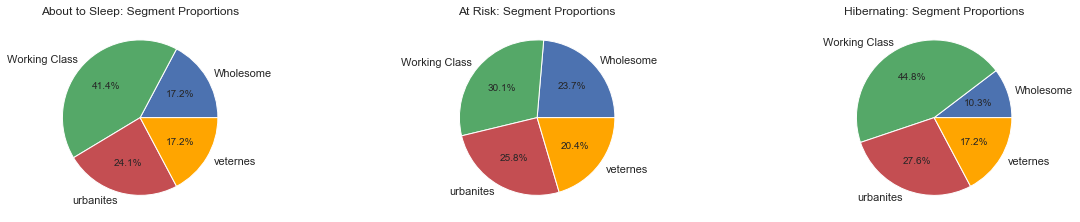

In [130]:


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

ax1.pie((rfm_seg_agg["About To Sleep"]/rfm_seg_agg["About To Sleep"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange') ,)
ax1.set_title("About to Sleep: Segment Proportions")

ax2.pie((rfm_seg_agg["At Risk"]/rfm_seg_agg["At Risk"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
ax2.set_title('At Risk: Segment Proportions')

ax3.pie((rfm_seg_agg["Hibernating"]/rfm_seg_agg["Hibernating"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
ax3.set_title('Hibernating: Segment Proportions')

Text(0.5, 1, 'Customers Needing Attention: Segment Proportions')

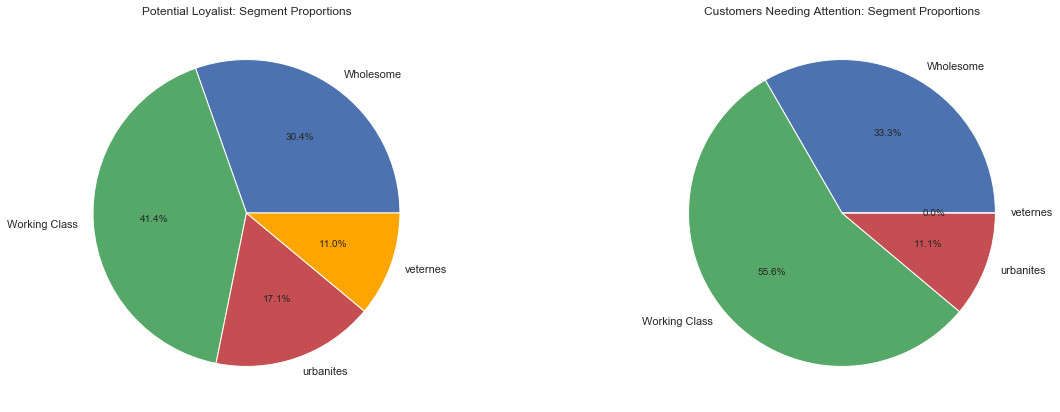

In [131]:


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

ax1.pie((rfm_seg_agg["Potential Loyalist"]/rfm_seg_agg["Potential Loyalist"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange') ,)
ax1.set_title("Potential Loyalist: Segment Proportions")

ax2.pie((rfm_seg_agg["Customers Needing Attention"]/rfm_seg_agg["Customers Needing Attention"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
ax2.set_title('Customers Needing Attention: Segment Proportions')



Text(0.5, 1, 'Loyal Customers: Segment Proportions')

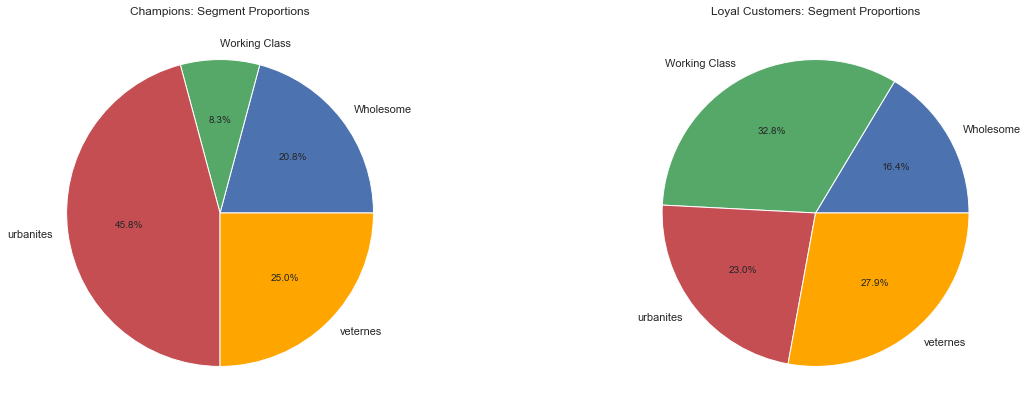

In [132]:


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

ax1.pie((rfm_seg_agg["Champions"]/rfm_seg_agg["Champions"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange') ,)
ax1.set_title("Champions: Segment Proportions")

ax2.pie((rfm_seg_agg["Loyal Customers"]/rfm_seg_agg["Loyal Customers"].sum()).values,
        labels = ['Wholesome', 'Working Class', 'urbanites', 'veternes'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
ax2.set_title('Loyal Customers: Segment Proportions')



- **From above pie charts we can see that urbanites and working class seem to stand out as having most number of champions and loyal customers, so this is where we can focus in terms of positioning(marketing) our new products**
- **It seems that we may want to put customer retention efforts on certain part of working class and wholesome before its too late**


### Bandwise praportions of RFM segments

In [149]:
df_final_seg = pd.DataFrame()
df_final_seg = df_proc.copy()

In [150]:
drop=['Unnamed: 0', 'Last_Inc_Brand', 'Last_Inc_Quantity',  'comp1', 'comp2', 'comp3']
df_final_seg.drop(drop , axis=1 , inplace=True)

In [151]:
df_seg_rfm.index.name="ID"

In [152]:
df_final_seg = df_final_seg.join(df_seg_rfm, on='ID').drop('Dummy', axis=1)


In [153]:
df_rfm_seg = pd.DataFrame(index=df_final_seg["rfm_segment"].unique())

In [154]:
df_rfm_seg["num_people"] =  df_final_seg.groupby(['rfm_segment', 'ID']).count().groupby(["rfm_segment"]).count()["Day"]
df_rfm_seg["num_visits"]  =  df_final_seg.groupby(["rfm_segment"]).count()['ID']
df_rfm_seg["num_purchases"]   = df_final_seg.groupby(["rfm_segment"]).sum()["Incidence"]
df_rfm_seg["brand_one_purch"]  =  df_final_seg[df_final_seg["Brand"]==1].groupby("rfm_segment").sum()["spent"]
df_rfm_seg["brand_two_purch"]  =  df_final_seg[df_final_seg["Brand"]==2].groupby("rfm_segment").sum()["spent"]
df_rfm_seg["brand_three_purch"]  =  df_final_seg[df_final_seg["Brand"]==3].groupby("rfm_segment").sum()["spent"]
df_rfm_seg["brand_four_purch"]   = df_final_seg[df_final_seg["Brand"]==4].groupby("rfm_segment").sum()["spent"]
df_rfm_seg["brand_five_purch"]  =  df_final_seg[df_final_seg["Brand"]==5].groupby("rfm_segment").sum()["spent"]
df_rfm_seg["total_purchase_value"] = df_final_seg.groupby('rfm_segment').sum()["spent"]

df_rfm_seg["purch_per_visit"] = df_rfm_seg["total_purchase_value"]/df_rfm_seg["num_visits"]

df_rfm_seg["purch_per_person"] = df_rfm_seg["total_purchase_value"]/df_rfm_seg["num_people"] 
df_rfm_seg["visit_per_person"] = df_rfm_seg["num_visits"] /df_rfm_seg["num_people"]
df_rfm_seg["brand_one_purch_per_person"] =  df_rfm_seg["brand_one_purch"] /df_rfm_seg["num_people"]
df_rfm_seg["brand_two_purch_per_person"] =  df_rfm_seg["brand_two_purch"] /df_rfm_seg["num_people"]
df_rfm_seg["brand_three_purch_per_person"] =  df_rfm_seg["brand_three_purch"] /df_rfm_seg["num_people"]
df_rfm_seg["brand_four_purch_per_person"] =  df_rfm_seg["brand_four_purch"] /df_rfm_seg["num_people"]
df_rfm_seg["brand_five_purch_per_person"] =  df_rfm_seg["brand_five_purch"] /df_rfm_seg["num_people"]


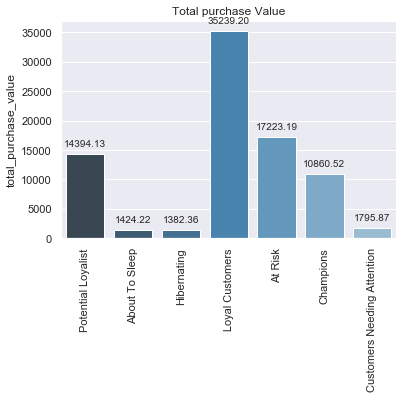

In [148]:

splot = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["total_purchase_value"], palette="Blues_d")
plt.title("Total purchase Value")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot.get_xticklabels(), rotation=90)
plt.show()

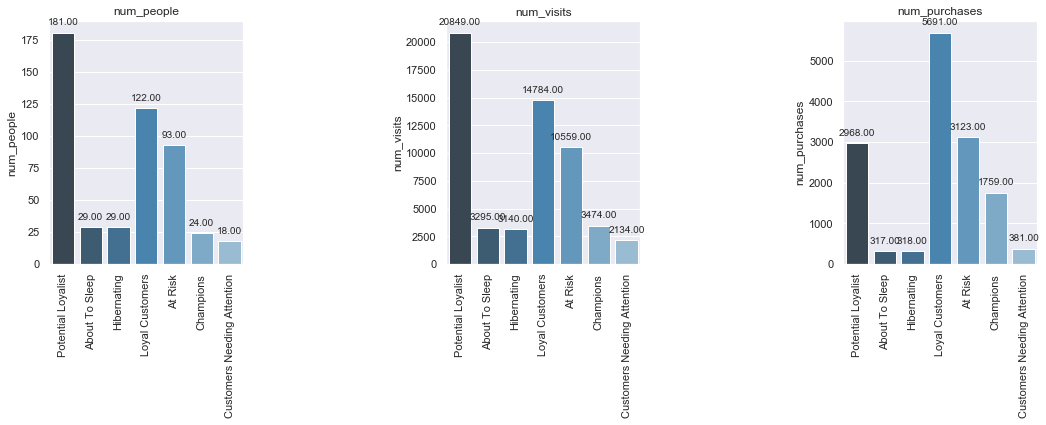

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=3.5)
fig.set_figheight(5)
fig.set_figwidth(18)


splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["num_people"] , ax=axes[0] , palette="Blues_d")
axes[ 0].set_title("num_people")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)


splot2 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["num_visits"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("num_visits")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)



splot3 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["num_purchases"] , ax=axes[2] , palette="Blues_d")
axes[ 2].set_title("num_purchases")
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot3.get_xticklabels(), rotation=90)





plt.show()
        

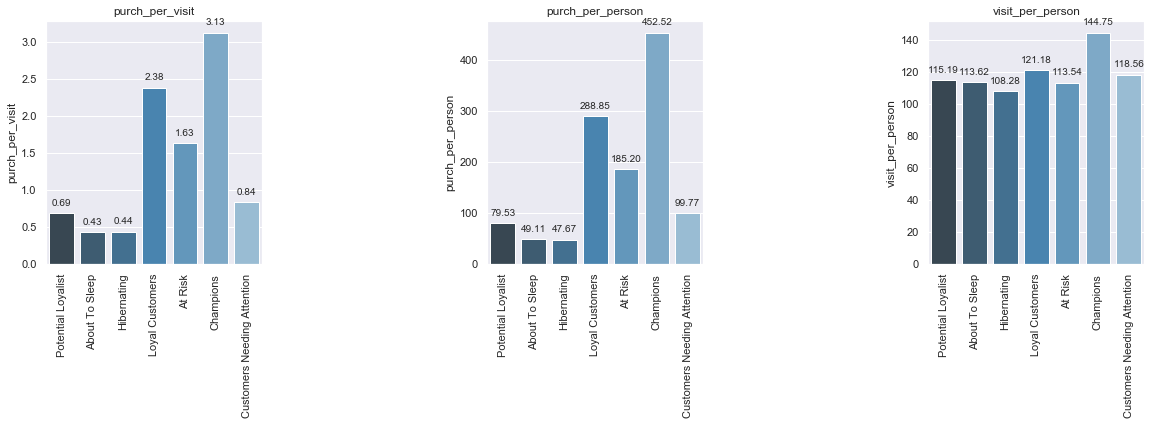

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=3.5)
fig.set_figheight(5)
fig.set_figwidth(20)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["purch_per_visit"] , ax=axes[0] , palette="Blues_d")
axes[ 0].set_title("purch_per_visit")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)


splot2 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)



splot3 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["visit_per_person"] , ax=axes[2] , palette="Blues_d")
axes[ 2].set_title("visit_per_person")
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot3.get_xticklabels(), rotation=90)







plt.show()
        

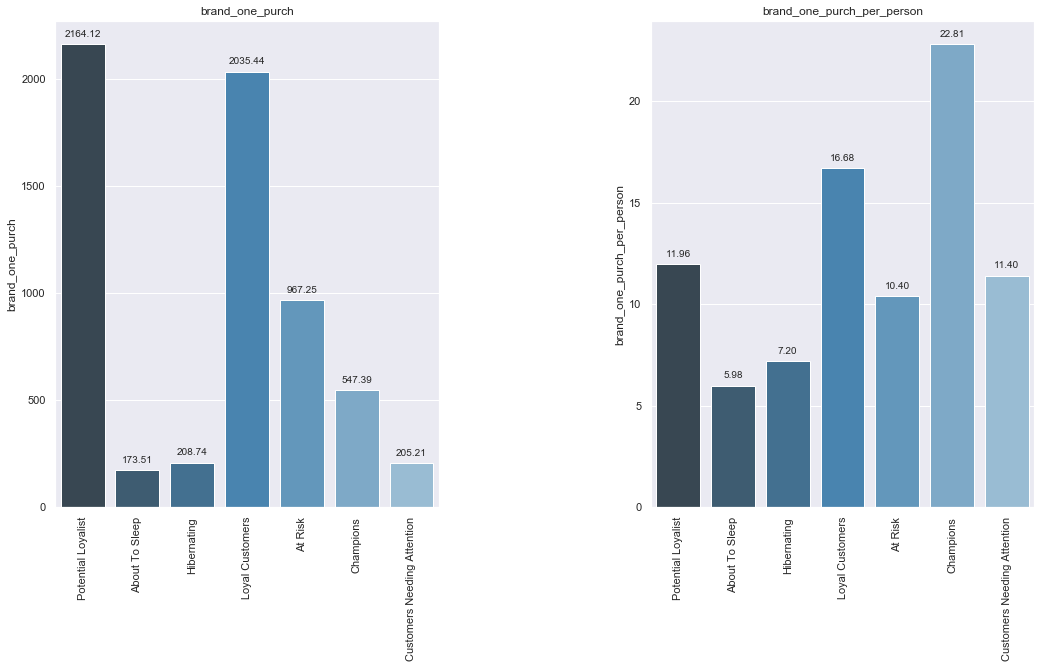

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["brand_one_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_one_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_rfm_seg.index.values , y =  df_rfm_seg["brand_one_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_one_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

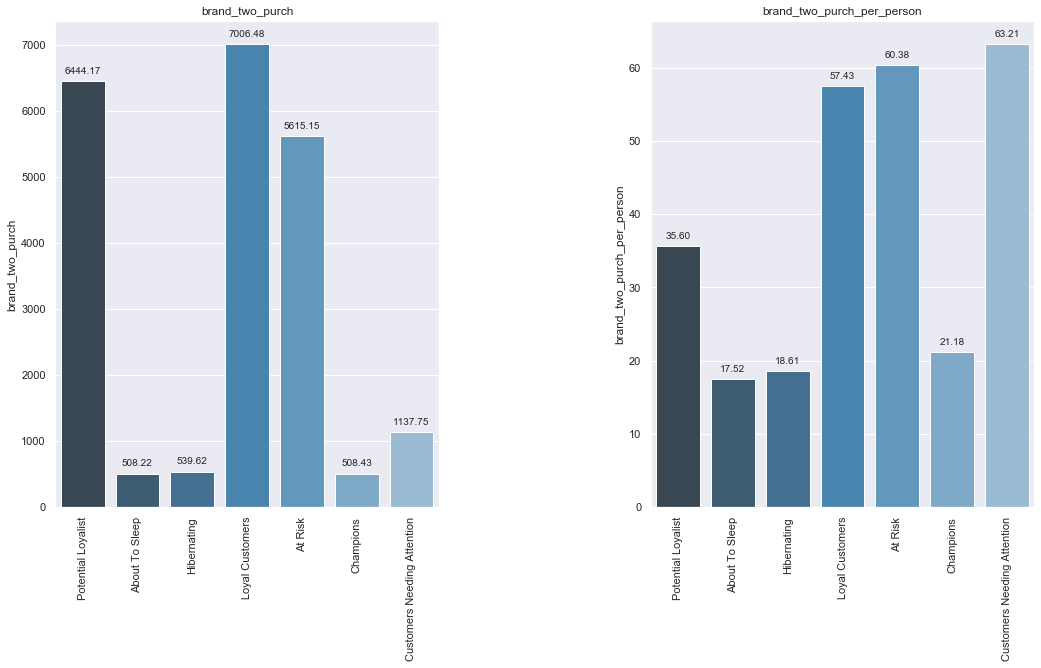

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["brand_two_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_two_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_rfm_seg.index.values , y =  df_rfm_seg["brand_two_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_two_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

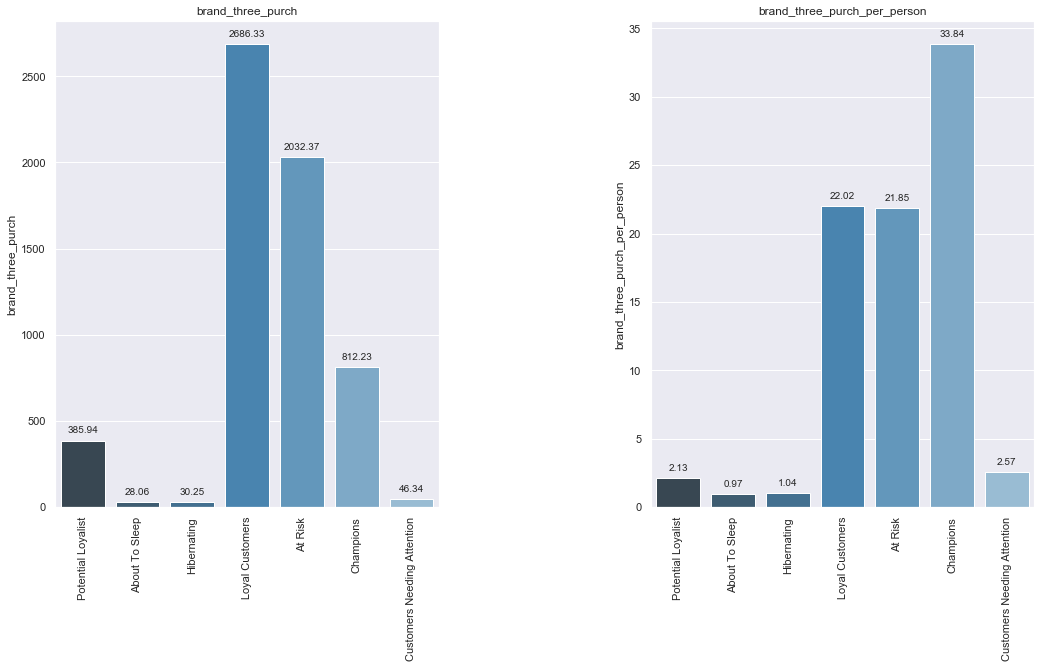

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["brand_three_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_three_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_rfm_seg.index.values , y =  df_rfm_seg["brand_three_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_three_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

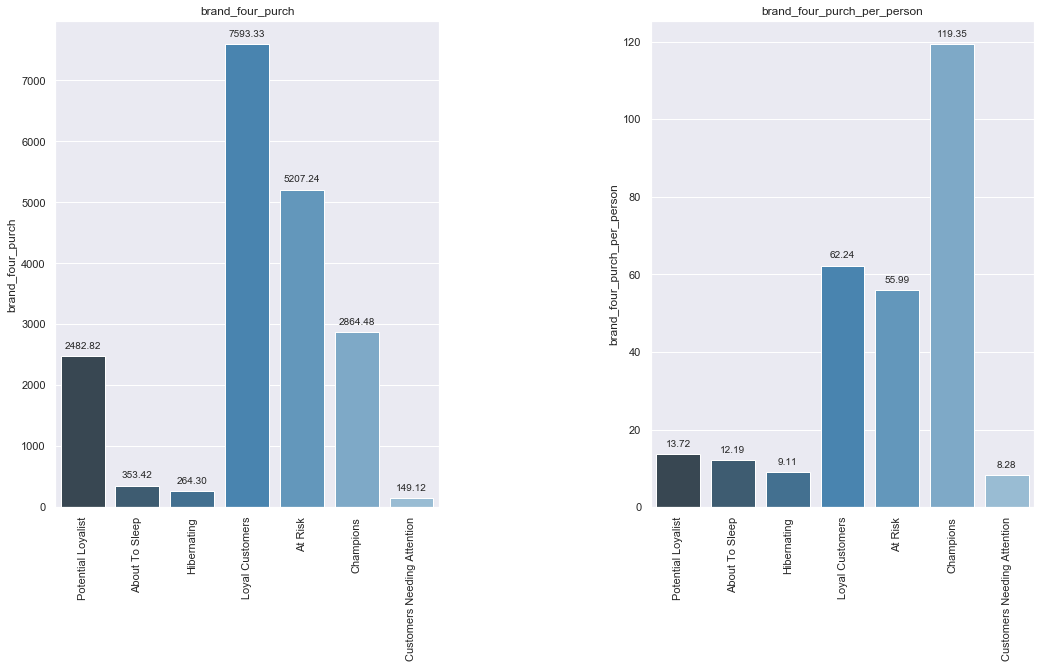

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["brand_four_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_four_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_rfm_seg.index.values , y =  df_rfm_seg["brand_four_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_four_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

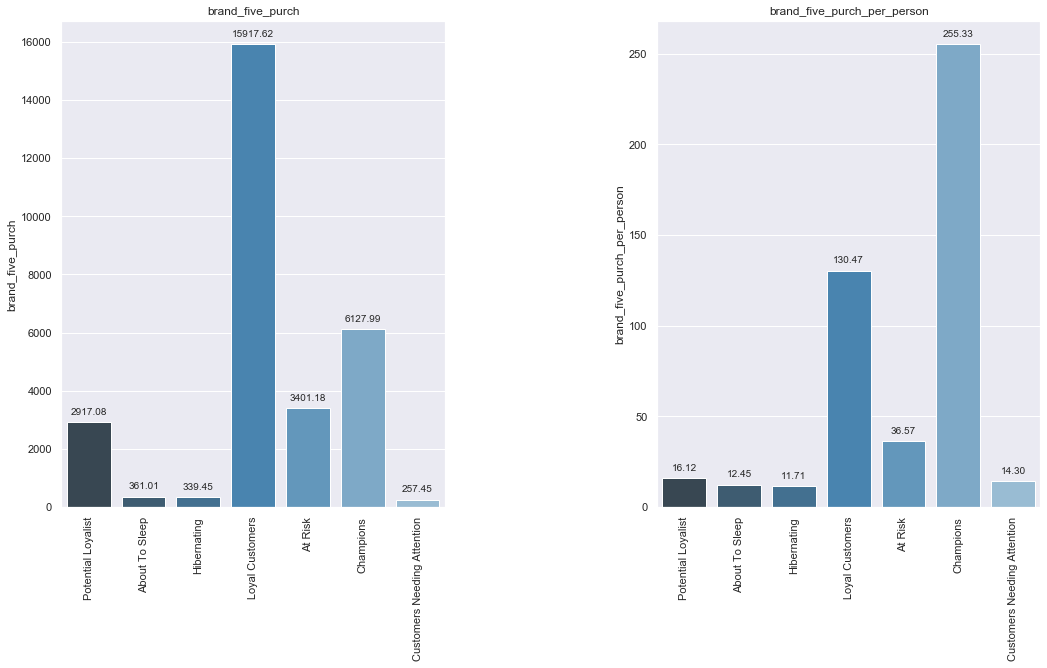

In [146]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.5)
fig.set_figheight(10)
fig.set_figwidth(18)

splot1 = sns.barplot(x =df_rfm_seg.index.values , y = df_rfm_seg["brand_five_purch"] , ax=axes[0] , palette="Blues_d")
axes[0].set_title("brand_five_purch")
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot1.get_xticklabels(), rotation=90)

splot2 = sns.barplot(x =df_rfm_seg.index.values , y =  df_rfm_seg["brand_five_purch_per_person"] , ax=axes[1] , palette="Blues_d")
axes[1].set_title("brand_five_purch_per_person")
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.setp(splot2.get_xticklabels(), rotation=90)


plt.show()
        

## Observations

- **As we can see above Loyal Customers actually bough the most candy**
- **Most number of people are in Potential Loyal Customer, It's always good to know that there is so much potential !**
- **Except for brand 2 in which 'customer needing more attention' segment has highest purchases, among all the other brands champions purchased more**
